In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading the datasets

df = pd.read_csv(r"H:\ML Project\Customer Churn\data\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#Exploratory data analysis

df.shape

(7043, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [13]:
if df["TotalCharges"].dtype == object:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].str.strip(), errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Exploratory Data Analysis

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


<Axes: >

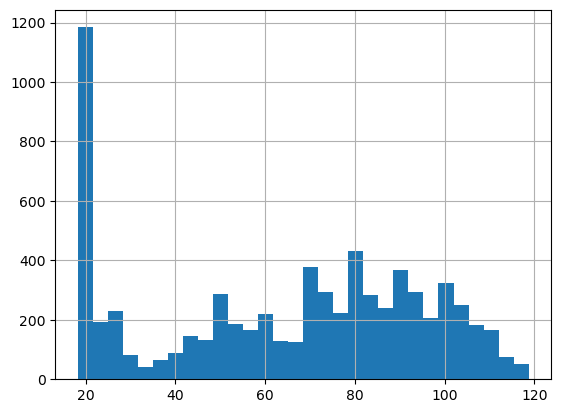

In [15]:
print(df["Churn"].value_counts(normalize=True))
print(pd.crosstab(df["Contract"], df["Churn"], normalize='index'))

df["MonthlyCharges"].hist(bins=30)


## Feature Egnineering

In [16]:
df["tenure"] = pd.cut(df["tenure"], bins=[0,12,24,48,72], labels= ["0-12", "13-24", "25-48", "49-72"])

In [18]:
# Dropping customer ID column

df = df.drop(columns = ["customerID"], errors="ignore")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0-12,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,25-48,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,0-12,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,25-48,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,0-12,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Prepare train/test splits and preprocessing pipelines

In [20]:
from sklearn.model_selection import train_test_split


X = df.drop("Churn", axis=1)
y = df["Churn"].map({"Yes": 1, "No": 0})

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify =y, test_size = 0.2, random_state =42)

In [21]:
numeric_features = X_train.select_dtypes(include=["int64", "float"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

In [24]:
# fixed pipeline code (robust to different sklearn versions)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# optional: check sklearn version for debugging
import sklearn
print("scikit-learn version:", sklearn.__version__)

# prepare encoder kwargs and create encoder in a version-robust way
encoder_kwargs = {"handle_unknown": "ignore"}
try:
    # try the older API (many older installs)
    onehot = OneHotEncoder(**encoder_kwargs, sparse=False)
except TypeError:
    # fallback for newer sklearn (where 'sparse' was renamed to 'sparse_output')
    onehot = OneHotEncoder(**encoder_kwargs, sparse_output=False)

numeric_transformers = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())   # name fixed from "scalar"
])

categorical_transformers = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # fixed typo
    ("onehot", onehot)
])

# make sure numeric_features and categorical_features are defined:
# numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # example
# categorical_features = ['Contract', 'InternetService', 'PaymentMethod']  # example

preprocessor = ColumnTransformer([
    ("num", numeric_transformers, numeric_features),
    ("cat", categorical_transformers, categorical_features)
])


scikit-learn version: 1.6.1


In [34]:
# Model training and Selection:

from sklearn.ensemble import RandomForestClassifier


clf = Pipeline([
    ("preprocessor", preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'tenure',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [35]:
## Model Evaluation and tuning:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

ROC AUC:  0.8146606732284483
[[926 109]
 [195 179]]


In [37]:


from sklearn.model_selection import RandomizedSearchCV



# Use double underscores to reference estimator params inside pipeline
param_dist = {
    "classifier__n_estimators": [100, 200, 400],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10]
}

search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1,           # set to 1 if you have problems with joblib / loky
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)

print("Best params:", search.best_params_)
best_model = search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params: {'classifier__n_estimators': 400, 'classifier__min_samples_split': 10, 'classifier__max_depth': 10}


In [42]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.67      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC:  0.8394559404789583
[[942  93]
 [187 187]]


In [43]:
## Saving the trained model

import joblib


joblib.dump(best_model, "H:\ML Project\Customer Churn\data/churn_model.joblib")

['H:\\ML Project\\Customer Churn\\data/churn_model.joblib']

In [44]:
# Saving test data.

# Combine features and target
test_df = X_test.copy()
test_df['Churn'] = y_test  # Make sure target column matches your training

# Save to CSV
test_df.to_csv(r"H:\ML Project\Customer Churn\data\test_data.csv", index=False)

In [45]:
best_model.predict_proba()

TypeError: Pipeline.predict_proba() missing 1 required positional argument: 'X'